# New York City: Motor Vehicle Collisions, 2018

<br></br>
<i>Open Data is a partnership between the Mayor's Office of Data Analytics (MODA), the Department of Information Technology and Telecommunications (DoITT), and Socrata. It aims to empower New Yorkers by providing them access to their city data.</i>

## Dataset

The New York City's motor vehicle collisions data from [NYC OpenData](https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions/h9gi-nx95) has recorded over 1.5 million collisions — and counting — since 2012. The dataset used here contains information on collisions that happened in 2018. For teaching purposes, Dataquest has implemented a few modifications, including random sampling, to reduce file size.

Here are the columns and their definitions:

| Column              | Definition          |
|:--------------------|:--------------------|
| unique_key | A unique identifier for each collision. |
| date, time | Date and time of the collision. |
| borough | The borough, or area of New York City, where the collision occurred. |
| location | Latitude and longitude coordinates for the collision. |
| on_street, cross_street, off_street | Details of the street or intersection where the collision occurred. |
| pedestrians_injured | Number of pedestrians who were injured. |
| cyclist_injured | Number of people traveling on a bicycle who were injured. |
| motorist_injured | Number of people traveling in a vehicle who were injured. |
| total_injured | Total number of people injured. |
| pedestrians_killed | Number of pedestrians who were killed. |
| cyclist_killed | Number of people traveling on a bicycle who were killed. |
| motorist_killed | Number of people traveling in a vehicle who were killed. |
| total_killed | Total number of people killed. |
| vehicle_1, vehicle_2, vehicle_3, vehicle_4, vehicle_5 | Type of each vehicle involved in the accident. |
| cause_vehicle_1, cause_vehicle_2, cause_vehicle_3, cause_vehicle_4, cause_vehicle_5 | Contributing factor for each vehicle in the accident. |

The primary goal here is to get acquainted with various ways of handling missing data without dropping rows and columns.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

mvc = pd.read_csv('datasets/nypd_mvc_2018.csv')
mvc.head(10).T

,0,1,2,3,4,5,6,7,8,9
unique_key,3869058,3847947,3914294,3915069,3923123,3987177,4008417,3917518,3953286,3896388
date,2018-03-23,2018-02-13,2018-06-04,2018-06-05,2018-06-16,2018-09-14,2018-10-19,2018-06-05,2018-08-03,2018-05-08
time,21:40,14:45,0:00,6:36,15:45,11:50,11:00,10:00,22:30,8:40
borough,MANHATTAN,BROOKLYN,NaN,QUEENS,BRONX,NaN,QUEENS,NaN,QUEENS,QUEENS
location,"(40.742832, -74.00771)","(40.623714, -73.99314)","(40.591755, -73.9083)","(40.73602, -73.87954)","(40.884727, -73.89945)","(40.785984, -73.95718)","(40.731968, -73.923225)","(40.660114, -74.00191)","(40.666393, -73.75177)","(40.715763, -73.737755)"
on_street,WEST 15 STREET,16 AVENUE,BELT PARKWAY,GRAND AVENUE,NaN,EAST 93 STREET,54 AVENUE,3 AVENUE,NORTH CONDUIT AVENUE,218 STREET
cross_street,10 AVENUE,62 STREET,NaN,VANLOON STREET,NaN,NaN,44 STREET,NaN,225 STREET,99 AVENUE
off_street,NaN,NaN,NaN,NaN,208 WEST 238 STREET,NaN,NaN,NaN,NaN,NaN
pedestrians_injured,0,0,0,0,0,0,0,0,0,0
cyclist_injured,0,0,0,0,0,0,0,0,0,0


Based on the sample data and the dictionary above, the columns seem to fall within five distinct buckets:

| Buckets             | Columns          |
|:--------------------|:--------------------|
| identifier | unique_key |
| datetime    | date, time |
| location    | borough, location, on_street, cross_street, off_street |
| people      | pedestrians_injured, cyclist_injured, motorist_injured, total_injured, pedestrians_killed, cyclist_killed, motorist_killed, total_killed |
| vehicles    | vehicle_1, vehicle_2, vehicle_3, vehicle_4, vehicle_5, cause_vehicle_1, cause_vehicle_2, cause_vehicle_3, cause_vehicle_4, cause_vehicle_5 |


## Identifying Null Values

As made evident by the sample data above, there are a few columns that seem to have a lot of null values. It seems that the first logical step is to identify how many null values there are in the dataset. 

The breakdown of null values in the `mvc` dataframe can be seen below. The breakdown includes a hard count of nulls, and percentage of total per column.

In [2]:
null_counts = mvc.isnull().sum()
null_pct = null_counts / mvc.shape[0] * 100.00

null_df = pd.DataFrame({'null_counts': null_counts, 'null_pct': null_pct}).astype(int)
null_df

,null_counts,null_pct
unique_key,0,0
date,0,0
time,0,0
borough,20646,35
location,3885,6
on_street,13961,24
cross_street,29249,50
off_street,44093,76
pedestrians_injured,0,0
cyclist_injured,0,0


About two-thirds of the columns have null values. Some of the columns with null values only have a few instances, while others have null values more than 90% of the time. These differences in composition suggests that the data handling needs to be tailored to the amount of null values.

## Filling the Total Columns

Because there are a few ways to handle these null values, it seems logical to start with columns that have smaller (almost negligible) percentages, like the `total_injured` and `total_killed` columns. Lesser null values suggest quicker fixes. Also, since these are total columns, it is possible to refer back to the columns that have produced these sums.

For instance, for `total killed`, the columns `pedestrians_killed`, `cyclist_killed`, and `motorist_killed` can be used. A separate dataframe for these `killed` columns can be created:

In [3]:
# use list comprehension to create a filter
killed_cols = [c for c in mvc.columns if 'killed' in c]

# apply filter and verify the data
killed = mvc[killed_cols].copy()
killed.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
pedestrians_killed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cyclist_killed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
motorist_killed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
total_killed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Next step is to identify rows where the actual total — the total of the `pedestrians_killed`, `cyclist_killed`, and `motorist_killed` values — does not match the recorded total.

In [4]:
# create a manual sum of killed pedestrians, cyclists, and motorists
killed_manual_sum = killed.iloc[:,[0,1,2]].sum(axis=1)

# identify discrepancies between actual vs. recorded totals
killed_mask = killed_manual_sum != killed.total_killed
killed[killed_mask]

,pedestrians_killed,cyclist_killed,motorist_killed,total_killed
3508,0,0,0,NaN
20163,0,0,0,NaN
22046,0,0,1,0.0
48719,0,0,0,NaN
55148,0,0,0,NaN
55699,0,0,0,NaN


There seems to be two scenarios here. One are `NaN` values that should be replaced with 0. The second one is a 0 total when the total should be 1.

Before jumping into applying a fix for these rows, the `injured` columns can also benefit from this procedure. Using `pedestrians_injured`, `cyclist_injured`, and `motorist_injured` to generate sums, it is possible to isolate the null value and any value that doesn't correspond with the total. 

A new dataframe `injured` has been created using list comprehension:

In [5]:
# create an 'injured' dataframe
injured = mvc[[col for col in mvc.columns if 'injured' in col]].copy()

# create a manual sum of injured pedestrians, cyclists, and motorists
injured_manual_sum = injured.iloc[:,:3].sum(axis=1)

# identify discrepancies between actual vs. recorded totals
injured_mask = injured_manual_sum != injured.total_injured
injured[injured_mask]

,pedestrians_injured,cyclist_injured,motorist_injured,total_injured
1222,0,0,1,0.0
3263,0,0,3,4.0
3362,0,0,0,1.0
3508,0,0,0,2.0
10989,0,0,0,1.0
12885,1,0,0,0.0
13344,0,0,0,1.0
15213,0,0,0,2.0
20163,0,0,0,1.0
20978,0,0,0,1.0


In [6]:
# replace NaN and incorrect values with manual sums
killed['total_killed'] = killed['total_killed'].mask(killed['total_killed'].isnull(), killed_manual_sum)
killed['total_killed'] = killed['total_killed'].mask(killed['total_killed'] != killed_manual_sum, np.nan)

# verifying no more rows have NaN values
killed[killed['total_killed'] == np.nan].shape[0]

0

In [7]:
# replace NaN with manual sums, incorrect values with NaN
injured['total_injured'] = injured['total_injured'].mask(injured['total_injured'].isnull(), injured_manual_sum)
injured['total_injured'] = injured['total_injured'].mask(injured['total_injured'] != injured_manual_sum, np.nan)

# verifying rows with NaN values
injured[injured['total_injured'].isnull()].shape[0]

21

In [8]:
injured[injured['total_injured'].isnull()]

,pedestrians_injured,cyclist_injured,motorist_injured,total_injured
1222,0,0,1,NaN
3263,0,0,3,NaN
3362,0,0,0,NaN
3508,0,0,0,NaN
10989,0,0,0,NaN
12885,1,0,0,NaN
13344,0,0,0,NaN
15213,0,0,0,NaN
20163,0,0,0,NaN
20978,0,0,0,NaN


In [9]:
summary = {
    'injured': [
        mvc['total_injured'].isnull().sum(),
        injured['total_injured'].isnull().sum()
    ],
    'killed': [
        mvc['total_killed'].isnull().sum(),
        killed['total_killed'].isnull().sum()
    ]
}
print(pd.DataFrame(summary, index=['before','after']))

        injured  killed
before        1       5
after        21       1


For the `total_killed` column, the null values decreased from 5 to 1. For the `total_injured` column, the number of values increased from 1 to 21. This might look counterproductive, but this allows for suspect data not to be included in the analysis.

With values corrected, the next step is to assign the results back to the main `mvc` dataframe.

In [10]:
# update the main dataframe
mvc['total_injured'] = injured['total_injured']
mvc['total_killed'] = killed['total_killed']

With the `total_injured` and `total_killed` columns corrected and updated, the next step is to visualize and analyze the data. Earlier, a table was used to communicate the count of missing values in the dataframe. An alternative approach is to visualize the missing data. The function below uses heatmap to represent null values as light squares and non-null values as dark squares.

In [11]:
def plot_null_matrix(df, figsize=(18,15)):
    plt.figure(figsize=figsize)
    
    # create dataframe for null values
    df_null = df.isnull()

    # create a heatmap of the boolean dataframe
    sns.heatmap(~df_null, cmap='Blues', cbar=False, yticklabels=False)
    plt.xticks(rotation=90, size='medium')
    plt.show()

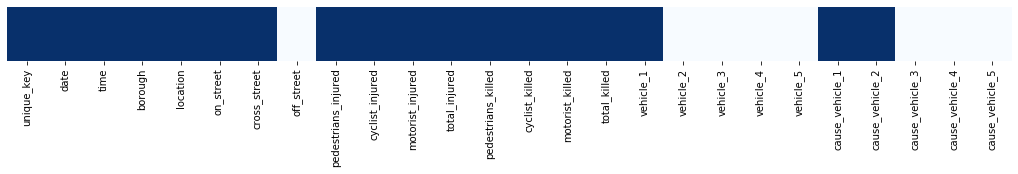

In [12]:
plot_null_matrix(mvc.head(1), figsize=(18,1))

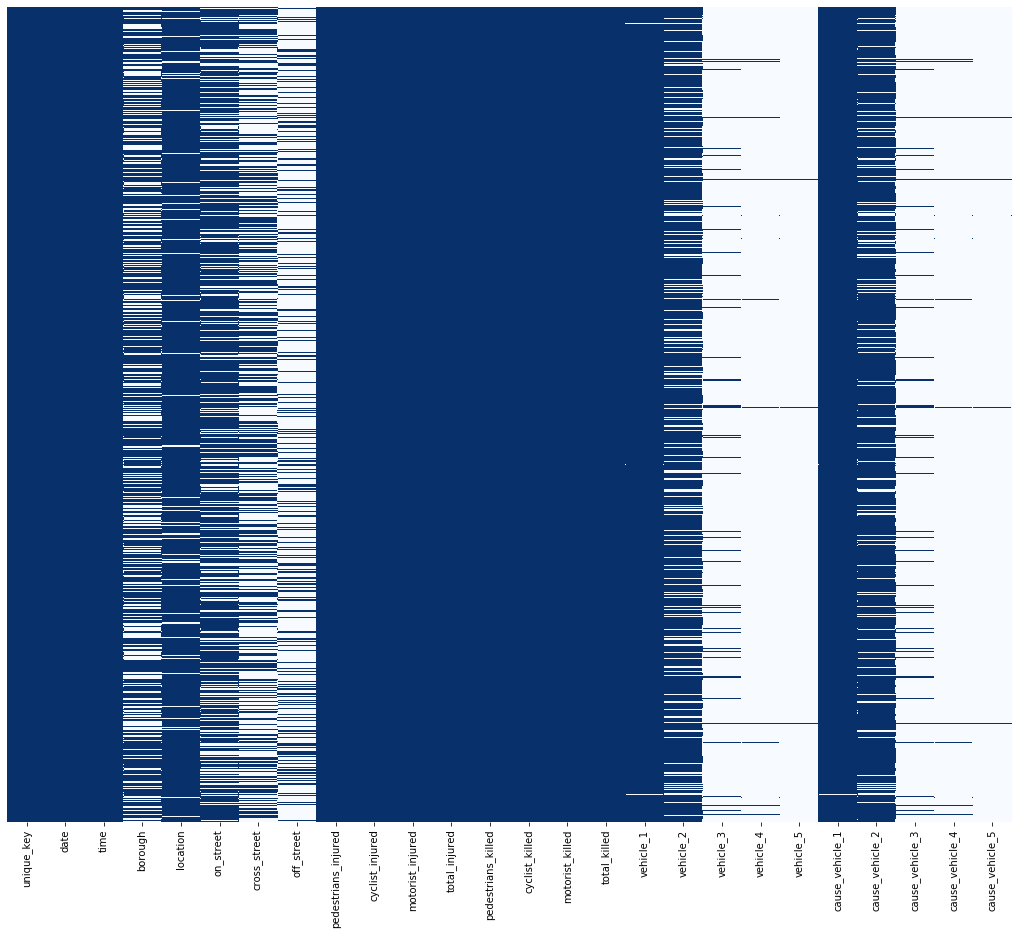

In [13]:
plot_null_matrix(mvc)

Based on the graphs above, some of the takeaways include:

- The first three columns (`unique_key`, `date` and `time`) have no missing values.
- The next five columns, which all pertain to the location of the incident, have missing values with varying densities. The column `off_street` has the most number of null values, while `location` has the least.
- The next eight columns are the `injury` and `killed` columns that were just cleaned. Although the graph doesn't  show the missing values, `total_injured` and `total_killed` do have null values.
- The last 10 columns are specific to vehicle information. Based on the column names and the patterns of null/non-null values, it seems that one `vehicle` column corresponds with another `cause_vehicle` column. The frequencies of nulls resonate from the first five columns to the next.

It seems like the next logical step is to investigate the remaining columns with missing values. Majority of these columns fall into the `vehicle` and the `location` buckets described earlier. Because of these syntactical relationships, it might be beneficial to check the correlations between these columns.

The table below provides a correlation metrics for all the columns with null values, including `total_injured` and `total_killed`.

In [14]:
cols_with_missing_vals = mvc.columns[mvc.isnull().sum() > 0]
missing_corr = mvc[cols_with_missing_vals].isnull().corr()
missing_corr

,borough,location,on_street,cross_street,off_street,total_injured,total_killed,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
borough,1.000000,0.190105,-0.350190,0.409107,0.362189,-0.002827,0.005582,-0.018325,-0.077516,-0.061932,-0.020406,-0.010733,-0.012115,-0.058596,-0.060542,-0.020158,-0.011348
location,0.190105,1.000000,-0.073975,-0.069719,0.084579,-0.001486,0.015496,-0.010466,-0.033842,-0.000927,0.004655,-0.005797,-0.003458,-0.021373,0.000684,0.004604,-0.004841
on_street,-0.350190,-0.073975,1.000000,0.557767,-0.991030,0.006220,-0.002344,-0.001889,0.119647,0.020867,0.004172,-0.002768,0.001307,0.087374,0.017426,0.002737,-0.003107
cross_street,0.409107,-0.069719,0.557767,1.000000,-0.552763,0.002513,0.004112,-0.017018,0.043799,-0.049910,-0.021137,-0.012003,-0.009102,0.031189,-0.052159,-0.022074,-0.013455
off_street,0.362189,0.084579,-0.991030,-0.552763,1.000000,-0.004266,0.002323,0.001812,-0.121129,-0.022404,-0.004074,0.002492,-0.001738,-0.088187,-0.019120,-0.002580,0.002863
total_injured,-0.002827,-0.001486,0.006220,0.002513,-0.004266,1.000000,-0.000079,0.079840,0.025644,-0.002757,0.002118,0.001073,0.131140,0.030082,-0.002388,0.002188,0.001102
total_killed,0.005582,0.015496,-0.002344,0.004112,0.002323,-0.000079,1.000000,-0.000327,0.008017,0.001057,0.000462,0.000234,-0.000229,0.009888,0.001091,0.000477,0.000240
vehicle_1,-0.018325,-0.010466,-0.001889,-0.017018,0.001812,0.079840,-0.000327,1.000000,0.151516,0.019972,0.008732,0.004425,0.604281,0.180678,0.020624,0.009022,0.004545
vehicle_2,-0.077516,-0.033842,0.119647,0.043799,-0.121129,0.025644,0.008017,0.151516,1.000000,0.131813,0.057631,0.029208,0.106214,0.784402,0.132499,0.058050,0.029264
vehicle_3,-0.061932,-0.000927,0.020867,-0.049910,-0.022404,-0.002757,0.001057,0.019972,0.131813,1.000000,0.437214,0.221585,0.014000,0.106874,0.961316,0.448525,0.225067


Here's the corresponding visualization. To reduce noise, weak correlations have been discarded.

In [15]:
def plot_null_correlations(df, figsize=(8,8)):
    # create a correlation matrix for columns with null values
    null_cols = df.columns[df.isnull().sum() > 0]
    null_corr = df[null_cols].isnull().corr()
    
    # create a triangular mask to remove repeated values in the plot
    null_corr = null_corr.iloc[1:, :-1]
    mask = np.triu(np.ones_like(null_corr), k=1)
    
    # plot a heatmap of the values
    plt.figure(figsize=figsize)
    ax = sns.heatmap(null_corr, vmin=-1, vmax=1, cbar=False,
                     cmap='Blues', mask=mask, annot=True)
    
    # format the plot text to make it easier to read
    for text in ax.texts:
        t = float(text.get_text())
        if -0.25 < t < 0.25:
            text.set_text('')
        else:
            text.set_text(round(t, 2))
        text.set_fontsize('medium')

    plt.xticks(rotation=90, size='medium')
    plt.yticks(rotation=0, size='medium')
    plt.show()

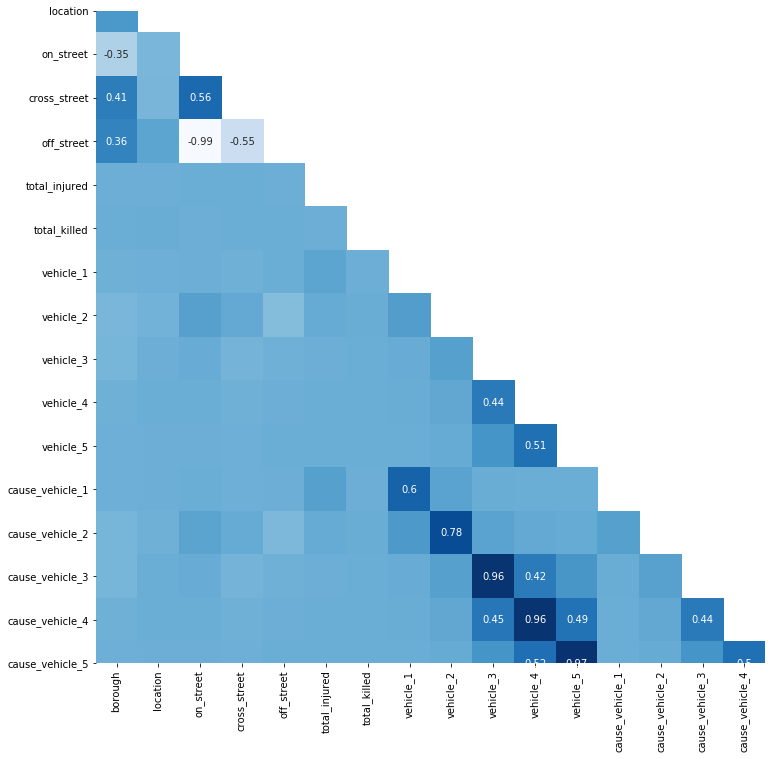

In [16]:
plot_null_correlations(mvc, figsize=(12,12))

There are two distinct sections in the plot above. One is on the top left, involving the `location` columns, particularly the streets (`on_street`, `cross_street`, and `off_street`). Another is the darkest section on the bottom right, involving the `vehicle` columns. You can see both sections in closer detail below.

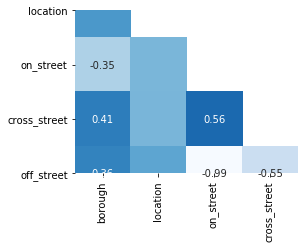

In [17]:
# grab all 'location' columns
l_headers = mvc.iloc[:,3:8].columns
plot_null_correlations(mvc[l_headers], figsize=(4,3))

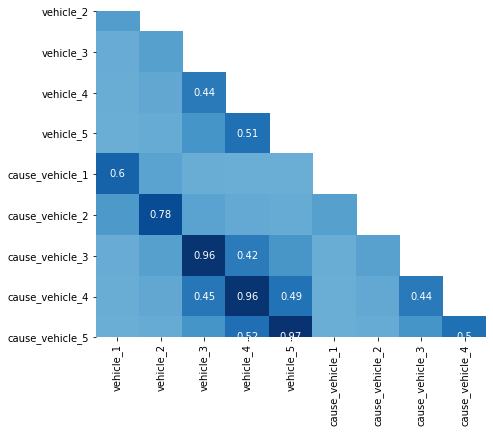

In [18]:
# grab all 'vehicle' columns
vc_headers = [c for c in mvc.columns if 'vehicle' in c]
vc_cols = mvc[vc_headers].copy()
plot_null_correlations(vc_cols, figsize=(7,6))

The diagonal strip of five squares in the darkest blue shows a perfect relationship (or near perfect, since the numbers have been rounded). The pairs of column names that make up these five correlations are:

- `vehicle_1` and `cause_vehicle_1`
- `vehicle_2` and `cause_vehicle_2`
- `vehicle_3` and `cause_vehicle_3`
- `vehicle_4` and `cause_vehicle_4`
- `vehicle_5` and `cause_vehicle_5`

These relationships make sense. When a vehicle gets in a collision, there is likely to be a cause. We can potentially use this relationship to impute data.

## Filling the `Vehicle` Columns

Exploring the variations in missing values from these five pairs of columns are as follows: 
- The number of values where the vehicle is missing when the cause is not missing.
- The number of values where the cause is missing when the vehicle is not missing.

The final structure of our dataframe will look like this:

In [19]:
v_headers = [v for v in mvc.columns if v.startswith('vehicle')]
c_headers = [c for c in mvc.columns if c.startswith('cause')]

def create_mask(v_or_c, i):
    vehicle = v_headers[i]
    cause = c_headers[i]
    if 'v':
        return (mvc[vehicle].isnull() & mvc[cause].notnull())
    elif 'c':
        return (mvc[cause].isnull() & mvc[vehicle].notnull())

In [20]:
def summarize_null():
    summarize_this = []

    for i in range(5):
        v_sum = create_mask('v', i).sum()
        c_sum = create_mask('c', i).sum()
        summarize_this.append([i+1, v_sum, c_sum])

    return pd.DataFrame(summarize_this, columns=['vehicle_number', 'vehicle_missing', 'cause_missing'])

In [21]:
vc_null = summarize_null()
vc_null

,vehicle_number,vehicle_missing,cause_missing
0,1,204,204
1,2,3793,3793
2,3,242,242
3,4,50,50
4,5,10,10


In [22]:
# total all missing values
vc_null.iloc[:,1:].sum()

vehicle_missing    4299
cause_missing      4299
dtype: int64

The totals above indicate that there are a little over 4,500 missing values across 10 columns. Dropping rows with missing values means losing about 10% of the total data, which may drastically change the composition of the dataframe.

A better option is to impute the data, as done earlier. One option is to use the most common value as substitute.
To see if the most common value can be used, below are the options:

In [23]:
# pull 10 most common values from 'vehicle_1' to '_5'
v_cols = mvc[v_headers].stack()
v_cols.value_counts().head(10)

Sedan                                  33133
Station Wagon/Sport Utility Vehicle    26124
PASSENGER VEHICLE                      16026
SPORT UTILITY / STATION WAGON          12356
Taxi                                    3482
Pick-up Truck                           2373
TAXI                                    1892
Box Truck                               1659
Bike                                    1190
Bus                                     1162
dtype: int64

In [24]:
# pull 10 most common values from 'cause_vehicle_1' to '_5'
c_cols = mvc[c_headers].stack()
c_cols.value_counts().head(10)

Unspecified                       57481
Driver Inattention/Distraction    17650
Following Too Closely              6567
Failure to Yield Right-of-Way      4566
Passing or Lane Usage Improper     3260
Passing Too Closely                3045
Backing Unsafely                   3001
Other Vehicular                    2523
Unsafe Lane Changing               2372
Turning Improperly                 1590
dtype: int64

Based on these lists, the top `cause` is an `Unspecified` placeholder. This is more useful compared to a null value because it makes the distinction between a missing value because the contributing cause for the vehicle is unknown versus one because there is no corresponding vehicle.

The vehicles columns don't have an equivalent placeholder, but the same technique can still be used. Below is the logic needed to do for each pair of vehicle/cause columns:

- For values where the vehicle is null and the cause is non-null, set the vehicle to `Unspecified`.
- For values where the cause is null and the vehicle is not-null, set the cause to `Unspecified`.

To recap, here is the summary of the counts of missing values per column:

In [25]:
missing_before = summarize_null()
missing_before

,vehicle_number,vehicle_missing,cause_missing
0,1,204,204
1,2,3793,3793
2,3,242,242
3,4,50,50
4,5,10,10


In [26]:
# replace null values with placeholders
for i in range(5):
    mvc[v_headers[i]] =  mvc[v_headers[i]].mask(create_mask('v', i), 'Unspecified')
    mvc[c_headers[i]] =  mvc[c_headers[i]].mask(create_mask('c', i), 'Unspecified')

In [27]:
missing_after = summarize_null()
missing_after

,vehicle_number,vehicle_missing,cause_missing
0,1,0,0
1,2,0,0
2,3,0,0
3,4,0,0
4,5,0,0


In [28]:
# count nulls for all vehicle columns
v_null_before = null_df.T[vc_headers].sum()
v_null_after = mvc[vc_headers].isnull().sum()

# get count of nulls replaced by placeholder
v_null_before.sum() - v_null_after.sum()

4915

After imputing the data, 4915 null values have been updated to `Unspecified`.

## Filling the `Location` Columns

Now, the focus is on the last set of columns with missing values, i.e., columns that relate to the location of the accident. As a reminder, sample rows of these columns can be seen below.

In [29]:
l_cols = mvc[l_headers]
l_cols.head()

,borough,location,on_street,cross_street,off_street
0,MANHATTAN,"(40.742832, -74.00771)",WEST 15 STREET,10 AVENUE,NaN
1,BROOKLYN,"(40.623714, -73.99314)",16 AVENUE,62 STREET,NaN
2,NaN,"(40.591755, -73.9083)",BELT PARKWAY,NaN,NaN
3,QUEENS,"(40.73602, -73.87954)",GRAND AVENUE,VANLOON STREET,NaN
4,BRONX,"(40.884727, -73.89945)",NaN,NaN,208 WEST 238 STREET


In [30]:
l_cols.isnull().sum()

borough         20646
location         3885
on_street       13961
cross_street    29249
off_street      44093
dtype: int64

Interestingly, these columns have a lot of missing values. Because all five columns are related, it might be possible to use non-null values from one column to impute null values of another. 

To see where this might be possible, below again is the heatmap of correlations between columns:

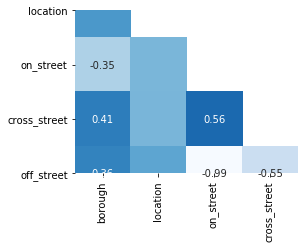

In [31]:
plot_null_correlations(l_cols, figsize=(4,3))

None of these columns have strong correlations except for `off_street` and `on_street`, which have a high negative correlation. That means for almost every row that has a null value in one column, the other has a non-null value and vice-versa.

The final way to look at null values in these columns is to plot a null matrix:

Null matrix sorted by borough:


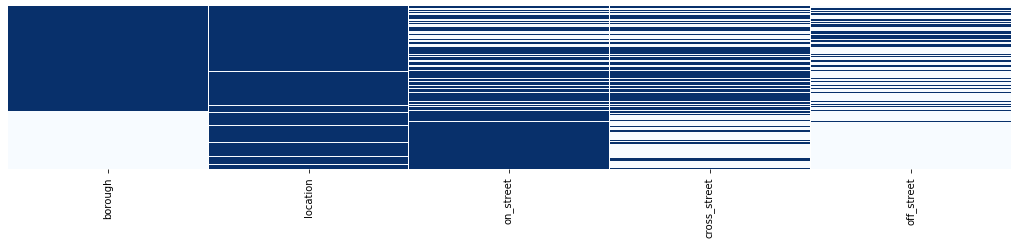

Null matrix sorted by location:


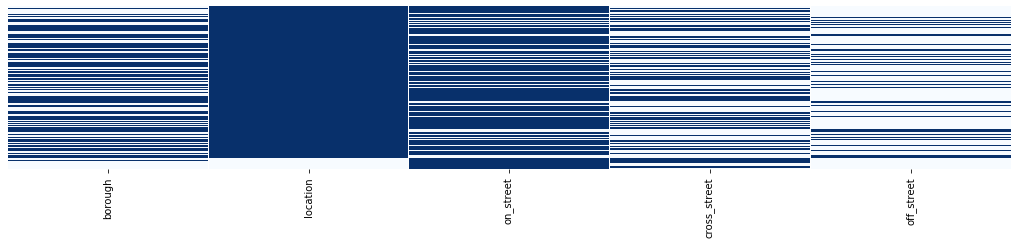

Null matrix sorted by on_street:


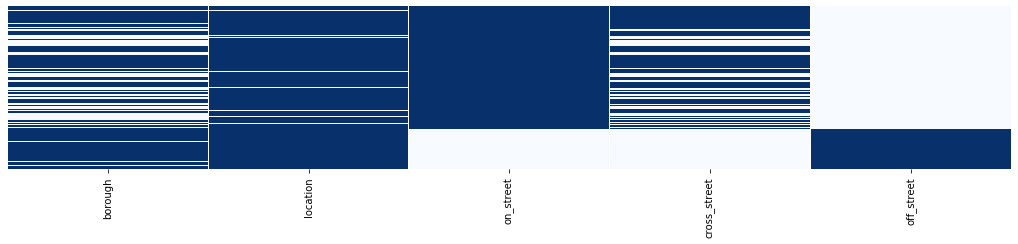

Null matrix sorted by cross_street:


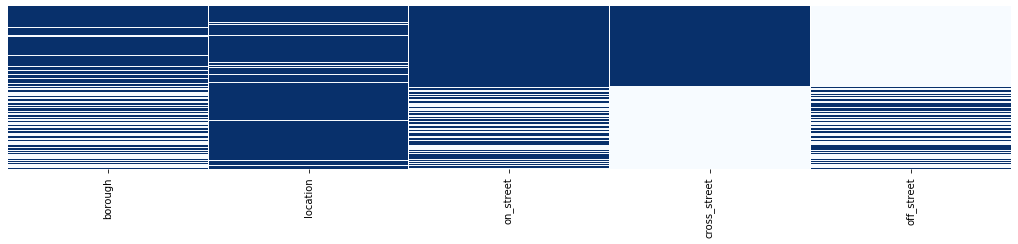

Null matrix sorted by off_street:


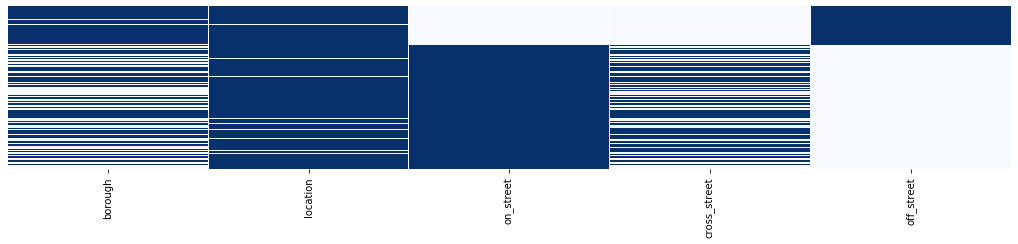

In [32]:
for i in range(5):
    header = l_headers[i]
    print('Null matrix sorted by {}:'.format(header))
    l_sorted = l_cols.sort_values(header)
    plot_null_matrix(l_sorted, figsize=(18,3))

Based on the graphs above, the following can be observed:

- About two-thirds of rows have non-null values for `borough`, but of those values that are missing, most have non-null values for `location` and one or more of the street name columns.
- Less than one-tenth of rows have missing values in the `location` column, but most of these have non-null values in one or more of the street name columns.
- Most rows have a non-null value for either `on_street` or `off_street`, and some also have a value for `cross_street`.

Combined, this means that it is possible to impute a significant amount of the missing values by using the other columns in each row. 

To accomplish this, the non-null values can be passed to Geolocation APIs that take either an address or location coordinates, then return the information about that location. Because the focus of this mission is working with missing data, Dataquest (DTQ) has provided a supplemental data using APIs. 

DTQ prepared the supplemental data using the GeoPy package, which makes working with Geocoding APIs like the Google Maps API easier. The strategy they used were as follows:

- For rows with location values but missing in either borough or the street name columns, they used APIs to look up the location coordinates.
- For rows with values in the street name columns missing borough and/or location data, they used APIs to look up the address.

The supplemental data is in a .csv called `supplemental_data.csv`. The sample data is below.

In [33]:
sup_data = pd.read_csv('datasets/supplemental_data.csv')
sup_data.head()

,unique_key,location,on_street,off_street,borough
0,3869058,NaN,NaN,NaN,NaN
1,3847947,NaN,NaN,NaN,NaN
2,3914294,NaN,BELT PARKWAY,NaN,BROOKLYN
3,3915069,NaN,NaN,NaN,NaN
4,3923123,NaN,NaN,NaN,NaN


The supplemental data has five taken from the original data set. These are the `unique_key` that identifies each collision, and four of the five location columns. The `cross_street` column is not included because the APIs used didn't have the cross street data.

Below is the null matrix for the supplemental data:

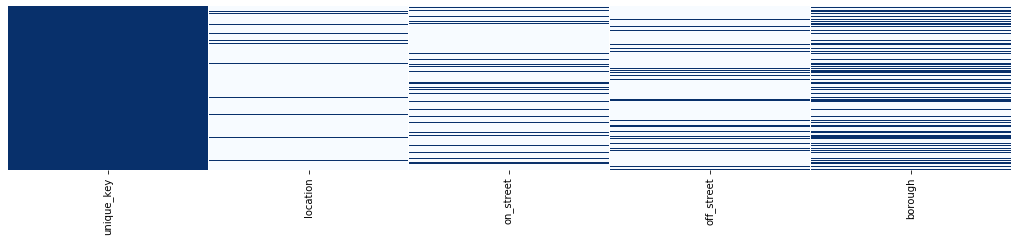

In [34]:
plot_null_matrix(sup_data, figsize=(18,3))

Apart from the `unique_key` column, there are a lot more missing values here than in the main dataset. This makes sense, as supplemental data wasn't prepared for rows where the original dataset had non-null values. If the `unique_key` column in both the original and supplemental data has the same values in the same order, it is possible to add the supplemental data to the original data.

In [35]:
# verify unique_key values are the same
mvc['unique_key'].equals(sup_data['unique_key'])

True

Here is summary of the null values before and after data cleaning.

In [36]:
loc_headers = sup_data.columns[1:]
l_null_before = mvc[loc_headers].isnull().sum()
l_null_before

location       3885
on_street     13961
off_street    44093
borough       20646
dtype: int64

In [37]:
# impute missing values
for l in loc_headers:
    null_mask = mvc[l].isnull()
    mvc[l] = mvc[l].mask(null_mask, sup_data[l])
    
l_null_after = mvc[loc_headers].isnull().sum()
l_null_after

location         77
on_street     13734
off_street    36131
borough         232
dtype: int64

In [38]:
# get count of nulls replaced by placeholder
l_null_before.sum() - l_null_after.sum()

32411

In [39]:
# count of null values replaced
null_df['null_counts'].sum() - mvc.isnull().sum().sum()

36694

## Conclusion

There are as many ways of imputing data as there are the kinds of data themselves. For this project, the following procedures have been used:

- For the `total_killed` and `total_injured` columns, values were generated by getting the totals from the corresponding columns that made up those totals. For example, for the `total_killed`, those columns were `pedestrians_killed`, `cyclist_killed`, and `motorist_killed`.
- For the `vehicle` and `cause_vehicle` columns, using a placeholder such as `Unspecified` helped update about 5,000 data points.
- For the `location` columns, using external sources (specifically, Geocoding APIs) lead to updating a little over 36,600 null values.